# Resolvendo problemas de regressão no aprendizado de máquina

Os algoritmos de aprendizado de máquina podem ser categorizados principalmente em dois tipos: algoritmos de aprendizado <b>supervisionado</b> e algoritmos de aprendizado <b>não supervisionado.</b>

Algoritmos de aprendizado de máquina supervisionado são aqueles algoritmos em que o conjunto de dados de entrada e a saída correspondente ou previsão real estão disponíveis, e os algoritmos tentam encontrar a relação entre as entradas e saídas.

Em algoritmos de aprendizado de máquina não supervisionados, no entanto, os verdadeiros rótulos para as saídas não são conhecidos. Em vez disso, os algoritmos tentam encontrar padrões semelhantes nos dados. Os algoritmos de agrupamento são um exemplo típico de aprendizagem não supervisionada.

Os algoritmos de aprendizagem supervisionada são divididos em dois tipos: <b>algoritmos de regressão e algoritmos de classificação</b>.

Os algoritmos de regressão preveem um valor contínuo, por exemplo, o preço de uma casa, a pressão arterial de uma pessoa e a pontuação de um aluno em um exame específico. Os algoritmos de classificação, por outro lado, prevêem um valor discreto, como se um tumor é maligno ou não, se um aluno vai ser aprovado ou reprovado em um exame, etc.

## Preparação de dados para problemas de regressão

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.get_dataset_names ()

Para ler um conjunto de dados específico no dataframe do Pandas, passe o nome do conjunto de dados para o método load_dataset() da biblioteca Seaborn.

In [ ]:
tips_df = sns.load_dataset("tips")

In [ ]:
tips_df.head()

In [ ]:
# da mesma forma podemos ler outro DF
diamond_df = sns.load_dataset("diamonds")
diamond_df.head()

# Dividindo dados em recursos e rótulos
Como primeira etapa, dividimos os dados em conjuntos de recursos e rótulos. Nosso conjunto de rótulos consiste em valores da coluna “dica”, enquanto o conjunto de recursos consiste em valores das colunas restantes. O script a seguir divide os dados em conjuntos de recursos e rótulos.

In [ ]:
X = tips_df.drop(['tip'], axis=1)
y = tips_df['tip']

In [ ]:
X.head()

In [ ]:
y.head()

## Conversão de dados categóricos em números
Os algoritmos de aprendizado de máquina, em sua maioria, só funcionam com números. Portanto, é importante converter dados categóricos em um formato numérico.

Nesse sentido, a primeira etapa é criar um conjunto de dados de todos os valores numéricos. Para fazer isso, elimine as colunas categóricas do conjunto de dados, conforme mostrado abaixo.

In [ ]:
numerical = X.drop(['sex', 'smoker', 'day', 'time'], axis=1)
numerical.head()

Em seguida, você precisa criar um dataframe que contenha apenas colunas categóricas.

In [ ]:
categorical = X.filter(['sex', 'smoker', 'day', 'time'])
categorical.head()

Uma das abordagens mais comuns para converter uma coluna categórica em numérica é por meio da codificação one-hot. Na codificação one-hot, para cada valor exclusivo nas colunas originais, uma nova coluna é criada. Por exemplo, para sexo, duas colunas: Feminino e Masculino, são criadas. Se a coluna de sexo original continha masculino, um 1 é adicionado na coluna Masculino recém-criada, enquanto 1 é adicionado na coluna Feminino recém-criada se a coluna de sexo original continha Feminino.

No entanto, pode-se notar que realmente não precisamos de duas colunas. Uma única coluna, ou seja, Feminino, é suficiente, pois quando um cliente é feminino, podemos adicionar 1 na coluna Feminino, caso contrário, pode ser adicionado 1 nessa coluna. Portanto, precisamos de N-1 colunas com codificação one-hot para todos os N valores na coluna original.

O script a seguir converte colunas categóricas em colunas com codificação one-hot usando o método pd.get_dummies ().

In [ ]:
import pandas as pd

cat_nuemrical = pd.get_dummies(categorical, drop_first=True)
cat_nuemrical.head()

A etapa final é unir as colunas numéricas às colunas codificadas one-hot. Para fazer isso, você pode usar a função concat() da biblioteca Pandas, conforme mostrado abaixo:

In [ ]:
X = pd.concat([numerical, cat_nuemrical], axis=1)
X.head()

Divida os dados em conjuntos de treinamento e teste
Depois de treinar um algoritmo de aprendizado de máquina, você precisa avaliá-lo para ver o desempenho dele em dados não vistos. Portanto, dividimos o conjunto de dados em dois conjuntos, ou seja, um conjunto de treinamento e um conjunto de teste. O conjunto de dados é treinado por meio do conjunto de treinamento e avaliado no conjunto de teste. Para dividir os dados em conjuntos de treinamento e teste, você pode usar a função train_test_split () da biblioteca Sklearn, conforme mostrado abaixo. O script a seguir divide os dados em um conjunto de treinamento de 80 por cento e um conjunto de teste de 20 por cento.

In [ ]:
from sklearn. model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20,
                                                    random_state=0)

# Escalonamento / normalização de dados
A etapa final (opcional) antes de os dados serem passados para algoritmos de aprendizado de máquina é dimensionar os dados. Você pode ver que algumas colunas do conjunto de dados contêm valores pequenos, enquanto as outras contêm valores muito grandes. É melhor converter todos os valores em uma escala uniforme. Para fazer isso, você pode usar a função StandardScaler() do módulo sklearn.preprocessing, conforme mostrado abaixo:

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Convertemos os dados em um formato que pode ser usado para treinar algoritmos de aprendizado de máquina para regressão da biblioteca Sklearn. 

# Regressão linear
A regressão linear é um modelo linear que presume uma relação linear entre entradas e saídas e minimiza o custo do erro entre a saída prevista e real usando funções como erro absoluto médio entre diferentes pontos de dados.

#### Por que usar o algoritmo de regressão linear?

O algoritmo de floresta aleatório é particularmente útil quando:

    1.A regressão linear é um algoritmo simples de implementar e facilmente interpretável.

    2.Leva menos tempo de treinamento para treinar, mesmo para grandes conjuntos de dados.

    3.Os coeficientes de regressão linear são fáceis de interpretar.

#### Desvantagens do algoritmo de regressão linear

A seguir estão as desvantagens do algoritmo de regressão linear:

    1.O desempenho é facilmente afetado pela presença de outliers.

    2.Pressupõe uma relação linear entre as variáveis dependentes e independentes, o que pode resultar em um aumento do erro.

#### Implementando Regressão Linear com Sklearn

Para implementar a regressão linear com Sklearn, você pode usar a classe LinearRegression do módulo sklearn.linear_model. Para treinar o algoritmo, os conjuntos de treinamento e teste, ou seja, X_train e X_test em nosso caso, são passados para o método <b>fit()</b> do objeto da classe LinearRegression. 

O conjunto de testes é passado para o método <b>predict()</b> da classe para fazer previsões. O processo de treinar e fazer previsões com o algoritmo de regressão linear é o seguinte:

In [ ]:
from sklearn.linear_model import LinearRegression

# treinando o algoritmo
lin_reg = LinearRegression()
regressor = lin_reg.fit(X_train, y_train)

# fazendo as previsões
y_pred = regressor.predict(X_test)

Depois de treinar um modelo e fazer previsões no conjunto de teste, a próxima etapa é saber o quão bem seu modelo foi executado para fazer previsões no conjunto de teste desconhecido. 

### Erro Médio Absoluto

O erro absoluto médio (MAE) é calculado tomando a média do erro absoluto obtido subtraindo os valores reais dos valores previstos. A equação para calcular o MAE é:

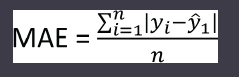

### Erro Quadrático Médio

O erro quadrático médio (MSE) é semelhante ao MAE. No entanto, o erro de cada registro é elevado ao quadrado no caso do MSE, a fim de punir os registros de dados com uma grande diferença entre os valores previstos e reais. A equação para calcular o erro quadrático médio é a seguinte:

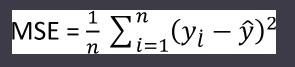

### Raiz do erro quadrático médio

O erro quadrático médio é simplesmente a raiz inferior do erro quadrático médio e pode ser calculado da seguinte forma:

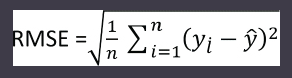

In [ ]:
from sklearn import metrics
import numpy as np

met_abs =  metrics.mean_absolute_error(y_test, y_pred)
met_sqrt = metrics.mean_squared_error(y_test, y_pred)
met_sqrt_np = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
print('Mean Absolute Error: %.4f' % met_abs)
print('Mean Squared Error: %.4f' % met_sqrt)
print('Root Mean Squared Error: %.4f' % met_sqrt_np)

Leituras Adicionais - Regressão Linear
Para estudar mais sobre regressão linear, verifique estes links:
1. https://bit.ly/2ZyCa49
2. https://bit.ly/2RmLhAp

# Regressão KNN
KNN significa vizinhos K-mais próximos. KNN é um algoritmo de aprendizado preguiçoso, que se baseia em encontrar distâncias euclidianas entre diferentes pontos de dados.

Por que usar o algoritmo KNN?

### O KNN é particularmente útil quando:

   1. O algoritmo KNN não assume nenhuma relação entre os recursos.

   2. Útil para um conjunto de dados onde a localização dos dados é importante.

   3. Só tem que ajustar o parâmetro K, que é o número de vizinhos mais próximos.

   4. Nenhum treinamento é necessário, pois é um algoritmo de aprendizado preguiçoso.

   5. Os sistemas de recomendação e a descoberta de semelhanças semânticas entre os documentos são as principais aplicações do algoritmo KNN.

### Desvantagens do Algoritmo KNN

A seguir estão as desvantagens do algoritmo KNN.

   1. Você tem que encontrar o valor ideal para K, o que não é fácil.

   2. Não é adequado para dados dimensionais muito elevados.

Implementando o Algoritmo KNN com SKlearn

Com o Sklearn, é extremamente fácil implementar a regressão KNN. Para fazer isso, você pode usar a classe KNeighborsRegressor. O processo de treinamento e teste é igual à regressão linear. Para treinamento, você precisa chamar o método fit(), e para teste, você precisa chamar o método predict().

O script a seguir mostra o processo de treinamento, teste e avaliação do algoritmo de regressão KNN para prever os valores da coluna de dicas do conjunto de dados Dicas.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

KNN_reg = KNeighborsRegressor(n_neighbors=5)
regressor = KNN_reg.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

met_abs =  metrics.mean_absolute_error(y_test, y_pred)
met_sqrt = metrics.mean_squared_error(y_test, y_pred)
met_sqrt_np = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error: %.4f' % met_abs)
print('Mean Squared Error: %.4f' % met_sqrt)
print('Root Mean Squared Error: %.4f' % met_sqrt_np)

# Leituras adicionais - Regressão KNN
Para estudar mais sobre a regressão KNN, verifique estes links:
1. https://bit.ly/35sIu0M
2. https://bit.ly/33r2Zbq

# Regressão Florestal Aleatória
A floresta aleatória é um algoritmo baseado em árvore que converte recursos em nós de árvore e, em seguida, usa a perda de entropia para fazer previsões.

Por que usar algoritmos de floresta aleatória?

### Algoritmos de floresta aleatórios são particularmente úteis quando:

   1. Você tem muitos dados ausentes ou um conjunto de dados desequilibrado.

   2. Com um grande número de árvores, você pode evitar o sobreajuste durante o treinamento. O overfitting ocorre quando os modelos de aprendizado de máquina apresentam melhor desempenho no conjunto de treinamento, mas pior no conjunto de teste.

   3. O algoritmo de floresta aleatório pode ser usado quando você tem dados dimensionais muito altos.

   4. Por meio da validação cruzada, o algoritmo de floresta aleatório pode retornar maior precisão.

   5. O algoritmo de floresta aleatória pode resolver tarefas de classificação e regressão e encontra sua aplicação em uma variedade de tarefas, desde detecção de fraude de cartão de crédito, previsão do mercado de ações e localização de transações online fraudulentas.

### Desvantagens dos algoritmos de floresta aleatória

Existem duas desvantagens principais nos algoritmos de floresta aleatória:

   1. Usar um grande número de árvores pode tornar o algoritmo mais lento.

   2. O algoritmo de floresta aleatória é um algoritmo preditivo, que pode apenas prever o futuro e não pode explicar o que aconteceu no passado usando o conjunto de dados.

Implementando o Random Forest Regressor usando Sklearn

A classe RandomForestRegressor do módulo Sklearn.ensemble pode ser usada para implementar algoritmos de regressor de floresta aleatório, conforme mostrado abaixo.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# treinando o algoritmo
rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)
regressor = rf_reg.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# avaliando modelo
met_abs =  metrics.mean_absolute_error(y_test, y_pred)
met_sqrt = metrics.mean_squared_error(y_test, y_pred)
met_sqrt_np = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error: %.4f' % met_abs)
print('Mean Squared Error: %.4f' % met_sqrt)
print('Root Mean Squared Error: %.4f' % met_sqrt_np)

Leituras adicionais - Regressão florestal aleatória
Para estudar mais sobre a regressão florestal aleatória, verifique estes links:
1. https://bit.ly/3bRkKEy
2. https://bit.ly/35u3BzH

# Support Vector Regression

A máquina de vetores de suporte é de classificação, bem como algoritmos de regressão, que minimizam o erro entre as previsões reais e as previsões previstas, maximizando a distância entre os hiperplanos que contêm dados para vários registros.

### Por que usar algoritmos SVR?

Support Vector Regression é uma variante da máquina de vetores de suporte (SVM) para regressão. O SVM tem os seguintes usos.

   1. Ele pode ser usado para realizar regressão ou classificação com dados dimensionais elevados.

   2. Com o truque do kernel, o SVM é capaz de aplicar regressão e classificação a conjuntos de dados não lineares.

   3. Os algoritmos SVM são comumente usados ​​para classificação ordinal ou regressão, e é por isso que são comumente conhecidos como algoritmos de classificação.

### Desvantagens dos algoritmos SVR

Existem três desvantagens principais dos algoritmos SVR:

   1. Muitos parâmetros a serem otimizados para obter o melhor desempenho.

   2. O treinamento pode demorar muito em grandes conjuntos de dados.

   3. Produz resultados ruins se o número de recursos for maior do que o número de registros em um conjunto de dados.

Implementando SVR usando Sklearn

Com a biblioteca Sklearn, você pode usar a classe SVM para implementar algoritmos de regressão de vetor de suporte, conforme mostrado abaixo.

In [ ]:
from sklearn import svm
from sklearn import metrics

# treinando modelo
svm_reg = svm.SVR()
regressor = svm_reg.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


# testando modelo
met_abs =  metrics.mean_absolute_error(y_test, y_pred)
met_sqrt = metrics.mean_squared_error(y_test, y_pred)
met_sqrt_np = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error: %.4f' % met_abs)
print('Mean Squared Error: %.4f' % met_sqrt)
print('Root Mean Squared Error: %.4f' % met_sqrt_np)

Leituras adicionais - Regressão de vetores de suporte
Para estudar mais sobre a regressão do vetor de suporte, verifique estes links:
1. https://bit.ly/3bRACH9
2. https://bit.ly/3mg5PZG

# Validação cruzada K Fold
Anteriormente, dividimos os dados em um conjunto de treinamento de 80 por cento e um conjunto de teste de 20 por cento. No entanto, isso significa que apenas 20 por cento dos dados são usados para teste e que 20 por cento dos dados nunca são usados para treinamento.

Para resultados mais estáveis, é recomendado que todas as partes do conjunto de dados sejam usadas pelo menos uma vez para treinamento e uma vez para teste. A técnica de validação cruzada K-Fold pode ser usada para fazer isso. Com a validação cruzada K-fold, os dados são divididos em K partes. Os experimentos também são realizados para peças K. Em cada experimento, as partes K-1 são usadas para treinamento e a parte Kth é usada para teste.

Por exemplo, na validação cruzada de 5 vezes, os dados são divididos em cinco partes iguais, por exemplo, K1, K2, K3, K4 e K5. Na primeira iteração, K1-K4 são usados para treinamento, enquanto K5 é usado para teste. No segundo teste, K1, K2, K3 e K5 são usados para treinamento e K4 é usado para teste. Desta forma, cada parte é usada pelo menos uma vez para teste e uma vez para treinamento.

Você pode usar a função cross_val_score () do sklearn. Módulo model_selection para realizar validação cruzada conforme mostrado abaixo:

In [ ]:
from sklearn.model_selection import cross_val_score

print((cross_val_score (regressor, X, y, cv = 5,
                        scoring ='neg_mean_absolute_error')))

# Fazendo previsões em um único registro
Nas seções anteriores, você viu como fazer previsões em um conjunto de teste completo. Nesta seção, você verá como fazer uma previsão usando um único registro como entrada.

Vamos escolher o 100 º registro de nosso conjunto de dados.

In [ ]:
tips_df.loc [100]

In [ ]:
tips_df.loc [50]

In [ ]:
tips_df.loc [25]

Vamos tentar prever o valor da ponta do 100º, 50º, 25º de forma independente e vamos compara-lo registro usando o algoritmo regressor Floresta aleatória e ver o que a saída que temos. Veja o script abaixo:

Observe que você precisa dimensionar seu único registro antes que ele possa ser usado como entrada para seu algoritmo de aprendizado de máquina.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)
regressor = rf_reg.fit(X_train, y_train)

single_record_100 = sc.transform(X.values[100].reshape(1,-1))
predict_tip = regressor.predict(single_record_100)

single_record_50 = sc.transform(X.values[50].reshape(1,-1))
predict_tip = regressor.predict(single_record_50)

single_record_25 = sc.transform(X.values[25].reshape(1,-1))
predict_tip = regressor.predict(single_record_25)

print(f'Single Record 100: {single_record_100}\n')
print(f'Single Record 50: {single_record_50}\n')
print(f'Single Record 25: {single_record_25}\n')

In [ ]:
# vamos transformar em DF para melhor vizualização
sg100 = pd.DataFrame(single_record_100, index=['test_100'])
sg50 = pd.DataFrame(single_record_50, index=['test_50'])
sg25 = pd.DataFrame(single_record_25, index=['test_25'])

In [ ]:
sg100

In [ ]:
sg50

In [ ]:
sg25

In [ ]:
# concatenando DFs
conc = [sg100, sg50, sg25]
sg_dfs = pd.concat(conc)
sg_dfs

In [ ]:
# renomeando colunas
sg_dfs = sg_dfs.rename(columns= {0: 'test_01',
                      1 : 'test_02',
                      2 : 'test_03',
                      3 : 'test_04',
                      4 : 'test_05',
                      5 : 'test_06',
                      6 : 'test_07',
                      7 : 'test_08'})

In [ ]:
sg_dfs

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor (random_state = 42, n_estimators = 500)
regressor = rf_reg.fit (X_train, y_train)
single_record = sc.transform (X.values[100].reshape (1, -1))
predicted_tip = regressor.predict (single_record)

print(predicted_tip)

In [ ]:
rf_reg = RandomForestRegressor(random_state=42, n_estimators=500)
regressor = rf_reg.fit(X_train, y_train)

single_record_100 = sc.transform(X.values[100].reshape(1,-1))
predict_tip_100 = regressor.predict(single_record_100)

single_record_50 = sc.transform(X.values[50].reshape(1,-1))
predict_tip_50 = regressor.predict(single_record_50)

single_record_25 = sc.transform(X.values[25].reshape(1,-1))
predict_tip_25 = regressor.predict(single_record_25)

print(f'Pedict Tip 100: {predict_tip_100}\n')
print(f'Predict Tip 50: {predict_tip_50}\n')
print(f'Predict Tip 25: {predict_tip_25}\n')

In [ ]:
sg_list = [[predict_tip_100, predict_tip_50, predict_tip_25]]
sg_list